In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0,0.5,'Income($)')

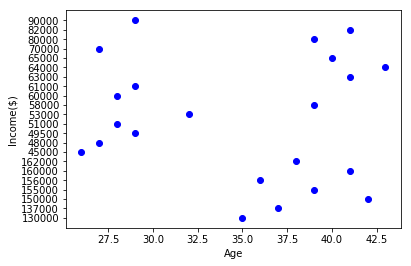

In [4]:
plt.scatter(df.Age, df[['Income($)']], color='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[  3.40000000e+01,   8.05000000e+04],
       [  3.82857143e+01,   1.50000000e+05],
       [  3.29090909e+01,   5.61363636e+04]])

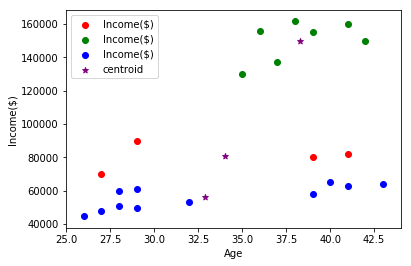

In [8]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age, df0['Income($)'], color='red')
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

<h3><b>Preprocessing using min max scaler</b></h3>

In [21]:
scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [22]:
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [15]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


Text(0,0.5,'Income($)')

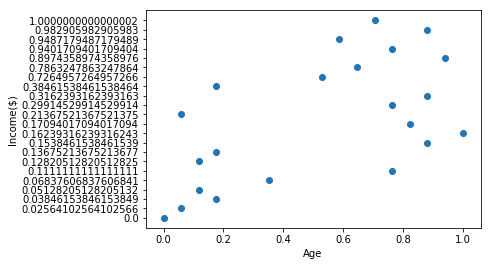

In [16]:
plt.scatter(df.Age, df[['Income($)']])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [17]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [18]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [19]:
km.cluster_centers_

array([[ 0.72268908,  0.8974359 ],
       [ 0.1372549 ,  0.11633428],
       [ 0.85294118,  0.2022792 ]])

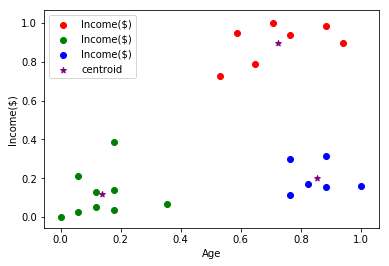

In [20]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age, df0['Income($)'], color='red')
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

<h2><b>Elbow Plot </b></h2>

In [37]:
sse = []
k_range = range(1,11)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [38]:
sse

[5.4340115119881762,
 2.0911363886990766,
 0.4750783498553095,
 0.34910470944195648,
 0.2755825568722976,
 0.21578607765873017,
 0.16869711728567782,
 0.13781880133764024,
 0.10497488680620906,
 0.085483851058482122]

Text(0,0.5,'Sum of Squared Error')

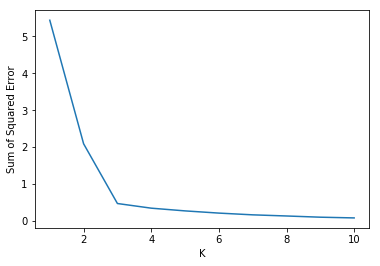

In [43]:
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

<h2><b>Exercise</b><h2>

1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.<br>
2.Figure out if any preprocessing such as scaling would help here<br>
3.Draw elbow plot and from that figure out optimal value of k

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [50]:
from sklearn.datasets import load_iris
iris = load_iris()

In [51]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [63]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
df = df.drop('sepal length (cm)', axis='columns')
df.head()

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [65]:
df = df.drop('sepal width (cm)', axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0,0.5,'petal width (cm)')

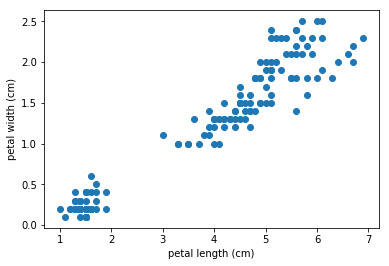

In [71]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [72]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
df['cluster'] = y_predicted
df[45:55]

,petal length (cm),petal width (cm),cluster
45,1.4,0.3,0
46,1.6,0.2,0
47,1.4,0.2,0
48,1.5,0.2,0
49,1.4,0.2,0
50,4.7,1.4,2
51,4.5,1.5,2
52,4.9,1.5,2
53,4.0,1.3,2
54,4.6,1.5,2


In [78]:
km.cluster_centers_

array([[ 1.464     ,  0.244     ],
       [ 5.59583333,  2.0375    ],
       [ 4.26923077,  1.34230769]])

In [92]:
df.cluster.unique()

array([0, 2, 1], dtype=int64)

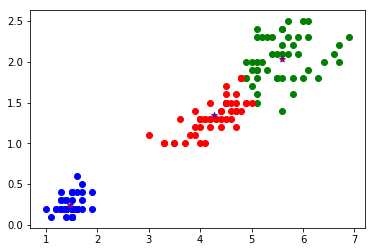

In [84]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

<h4><b>Elbow Plot to figure out the optimal K</b></h4>

In [86]:
sse = []
k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

In [87]:
sse

[550.64346666666665,
 86.403945335710034,
 31.387758974358981,
 19.49940089968511,
 13.933308757908758,
 11.089449150654415,
 9.2902811092289355,
 7.6834195234462968,
 6.5875768476621417]

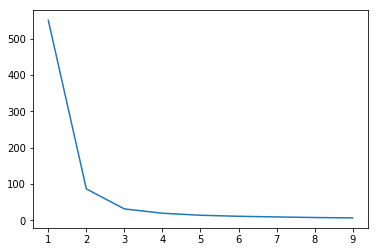

In [89]:
plt.plot(k_range, sse)